# QUESTION NO. 1 >> Predictimg Delivery Time Using Sorting time

In [1]:
# For reading data set
# importing necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
dt=pd.read_csv("delivery_time.csv")

In [2]:
dt.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [3]:
dt.info

<bound method DataFrame.info of     Delivery Time  Sorting Time
0           21.00            10
1           13.50             4
2           19.75             6
3           24.00             9
4           29.00            10
5           15.35             6
6           19.00             7
7            9.50             3
8           17.90            10
9           18.75             9
10          19.83             8
11          10.75             4
12          16.68             7
13          11.50             3
14          12.03             3
15          14.88             4
16          13.75             6
17          18.11             7
18           8.00             2
19          17.83             7
20          21.50             5>

In [4]:
dt.columns=("dt","st") # Changing the data set column names as per our requirement 

In [5]:
dt.columns

Index(['dt', 'st'], dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a97545cca0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a9754793a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a97545c940>],
 'medians': [<matplotlib.lines.Line2D at 0x1a975479a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a975479d60>],
 'means': []}

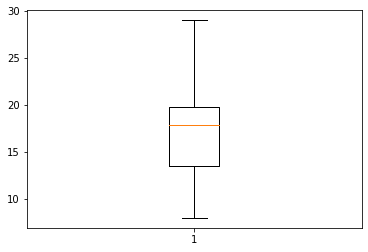

In [6]:
plt.boxplot(dt.dt)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a97550c070>,
 'caps': [<matplotlib.lines.Line2D at 0x1a97550c730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a9754fccd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a97550cdf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a975517130>],
 'means': []}

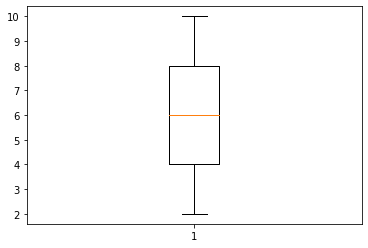

In [7]:
plt.boxplot(dt.st)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <a list of 10 Patch objects>)

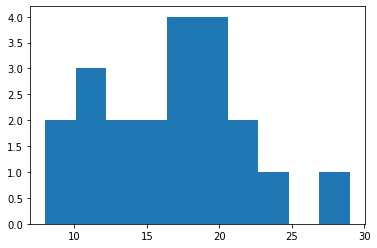

In [8]:
plt.hist(dt.dt)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <a list of 10 Patch objects>)

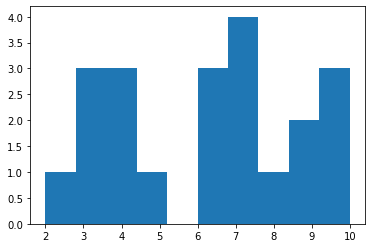

In [9]:
plt.hist(dt.st)

In [10]:
dt.size

42

In [11]:
dt.shape

(21, 2)

In [12]:
dt.skew

<bound method DataFrame.skew of        dt  st
0   21.00  10
1   13.50   4
2   19.75   6
3   24.00   9
4   29.00  10
5   15.35   6
6   19.00   7
7    9.50   3
8   17.90  10
9   18.75   9
10  19.83   8
11  10.75   4
12  16.68   7
13  11.50   3
14  12.03   3
15  14.88   4
16  13.75   6
17  18.11   7
18   8.00   2
19  17.83   7
20  21.50   5>

In [13]:
dt.head()

,dt,st
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [14]:
dt.tail()

,dt,st
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


Text(0, 0.5, 'Sorting time')

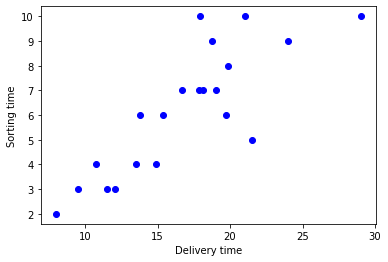

In [15]:
plt.plot(dt.dt,dt.st,"bo");plt.xlabel("Delivery time");plt.ylabel("Sorting time")

In [16]:
dt.dt.corr(dt.st)# Positive Strong Correlation 

0.8259972607955326

In [17]:
# For preparing linear regression model we need to import the statsmodels.formula.api
import statsmodels.formula.api as smf
model=smf.ols("st~dt",data=dt).fit()

In [18]:
# For getting coefficients of the varibles used in equation
model.params

Intercept   -0.756673
dt           0.413744
dtype: float64

In [19]:
# P-values for the variables and R-squared value for prepared model

model.summary() # Hence P valuve is very low which means that the there is strong correlation between these coeeficients and target(st)

# R^2 Value is 0.682 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     st   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           3.98e-06
Time:                        22:51:42   Log-Likelihood:                -36.839
No. Observations:                  21   AIC:                             77.68
Df Residuals:                      19   BIC:                             79.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7567      1.134     -0.667      0.513      -3.130       1.617
dt             0.4137      0.065      6.387      0.000       0.278       0.549
==============================================================================
Omnibus:                        1.409   Durbin-Watson:                   1.346
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                0.371
Skew:                           0.255   Prob(JB):                        0.831
Kurtosis:                       3.405   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
print (model.conf_int(0.05)) # 95% confidence interval

                  0         1
Intercept -3.130058  1.616712
dt         0.278169  0.549318


In [21]:
pred = model.predict(dt.iloc[:,0]) # Predicted values of dt  using the model

Text(0, 0.5, 'Sorting time')

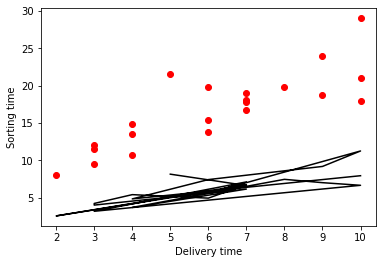

In [22]:
# Visualization of regresion line over the scatter plot of Churn_out_rate and Salary_hike
# For visualization we need to import matplotlib.pyplot
import matplotlib.pylab as plt
plt.scatter(x=dt['st'],y=dt['dt'],color='red');plt.plot(dt['st'],pred,color='black');plt.xlabel('Delivery time');plt.ylabel('Sorting time')


In [23]:
pred.corr(dt.dt)

0.9999999999999998

In [24]:
# Transforming variables for accuracy
model2 = smf.ols('st~np.log(dt)',data=dt).fit()
model2.params
model2.summary() ## After Tarnsforming the my iput variable my model gave Accuracy from 68% to  71%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     st   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           1.59e-06
Time:                        22:51:52   Log-Likelihood:                -35.846
No. Observations:                  21   AIC:                             75.69
Df Residuals:                      19   BIC:                             77.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.4992      2.751     -4.543      0.000     -18.257      -6.741
np.log(dt)     6.7355      0.985      6.836      0.000       4.673       8.798
==============================================================================
Omnibus:                        1.323   Durbin-Watson:                   1.202
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.242
Skew:                          -0.025   Prob(JB):                        0.886
Kurtosis:                       3.523   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
print(model2.conf_int(0.01)) # 99% confidence level

                    0         1
Intercept  -20.369797 -4.628668
np.log(dt)   3.916690  9.554407


In [26]:
pred2 = model2.predict(pd.DataFrame(dt['dt']))
pred2.corr(dt.st)
# pred2 = model2.predict(wcat.iloc[:,0])
pred2

0      8.007296
1      5.031310
2      7.593942
3      8.906703
4     10.181351
5      5.896328
6      7.333179
7      2.664452
8      6.931482
9      7.243965
10     7.621170
11     3.497060
12     6.456018
13     3.951314
14     4.254794
15     5.686869
16     5.154901
17     7.010043
18     1.506947
19     6.905090
20     8.165786
dtype: float64

Text(0, 0.5, 'sorting time')

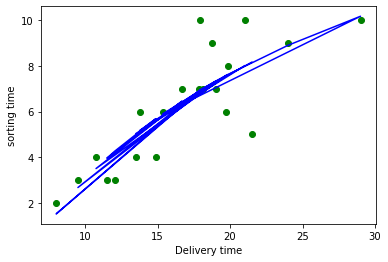

In [27]:
plt.scatter(x=dt['dt'],y=dt['st'],color='green');plt.plot(dt['dt'],pred2,color='blue');plt.xlabel('Delivery time');plt.ylabel('sorting time')


## Exponential Transform 

In [28]:
# Exponential transformation
model3 = smf.ols('np.log(st)~dt',data=dt).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(st)   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           2.64e-06
Time:                        22:52:12   Log-Likelihood:               -0.85600
No. Observations:                  21   AIC:                             5.712
Df Residuals:                      19   BIC:                             7.801
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4372      0.204      2.139      0.046       0.009       0.865
dt             0.0769      0.012      6.587      0.000       0.052       0.101
==============================================================================
Omnibus:                        0.744   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.686
Skew:                          -0.101   Prob(JB):                        0.710
Kurtosis:                       2.138   Cond. No.                         62.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Transforming variables for accuracy
model4 = smf.ols('np.log(st)~np.log(dt)',data=dt).fit()
model4.params
model4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(st)   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           1.60e-07
Time:                        22:52:13   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
np.log(dt)     1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""








# So we will consider the model having highest R-Squared value which is the log transformation --- Model 4
